# 数据挖掘实验一 鸢尾花分类

| 姓名 | 学号 | 班级 | 
|-------|------|-------|
| 许汝超 | 1806100021 | 计科185 |


## 一、实验要求

### 1.1 实验环境

IDE: Jupyterlab

工具包: Scikit-learn、Graphviz等

数据集: IRIS Dataset鸢尾花数据集

### 1.2 实验内容

1. 绘制各维度直方图

2. 绘制各维度散点图矩阵

3. 训练决策树模型，可视化决策树

4. 尝试不同决策树参数对分类准确度的影响

## 二、数据集和模型简介

### 2.1 数据集介绍
鸢尾花数据集内包含 3 类（iris-setosa, iris-versicolour, iris-virginica）共 150 条记录，每类各 50 个数据，每条记录都有 4 项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度。
可以通过这4个特征对鸢尾花进行聚类或者预测鸢尾花卉属于中的哪一品种。


<img src="https://i.loli.net/2021/01/05/BTIHfA3nzRklLb2.png"  height="330" width="495">


<img src="https://i.loli.net/2021/01/05/oYXQwWMpNIUTq3d.png"  height="330" width="495">


### 2.2 决策树模型介绍

决策树（decision tree）是一种描述对实例进行分类的树形结构。


决策树由结点和有向边组成。结点有两种类型：内部结点和叶结点。内部结点表示一个特征或属性，每个分支代表这个特征属性在某个值域上的输出，叶结点表示一个类。


使用决策树进行决策的过程就是从根结点开始，测试待分类项中相应的特征属性，并按照其值选择输出分支，直到到达叶结点，将叶结点存放的类别作为决策结果。




## 三、实验过程记录

1. 数据集探索

2. 绘制各维度直方图和散点图矩阵

3. 训练决策树模型，可视化决策树，尝试不同决策树参数对分类准确度的影响

## 3.1 数据集探索

In [1]:
#导入一些工具包和sklearn的鸢尾花数据集
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris
# 加载鸢尾花数据集
iris_dataset = load_iris()

In [2]:
# 查看数据集对象的属性和方法
dir(iris_dataset)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris_dataset.data.shape

(150, 4)

In [3]:
import pandas as pd
# 用pandas列出鸢尾花数据集的内容和标签
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df['label'] = iris_dataset.target

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


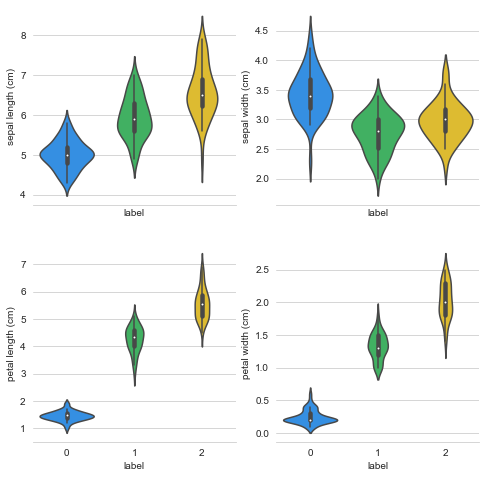

In [20]:
import seaborn as sns
sns.set_style("whitegrid")

# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14']
# 绘制  Violinplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)
sns.violinplot(x='label', y='sepal length (cm)', data=iris_df, palette=antV, ax=axes[0, 0])
sns.violinplot(x='label', y='sepal width (cm)', data=iris_df, palette=antV, ax=axes[0, 1])
sns.violinplot(x='label', y='petal length (cm)', data=iris_df, palette=antV, ax=axes[1, 0])
sns.violinplot(x='label', y='petal width (cm)', data=iris_df, palette=antV, ax=axes[1, 1])
plt.savefig("violin.png")
plt.show()

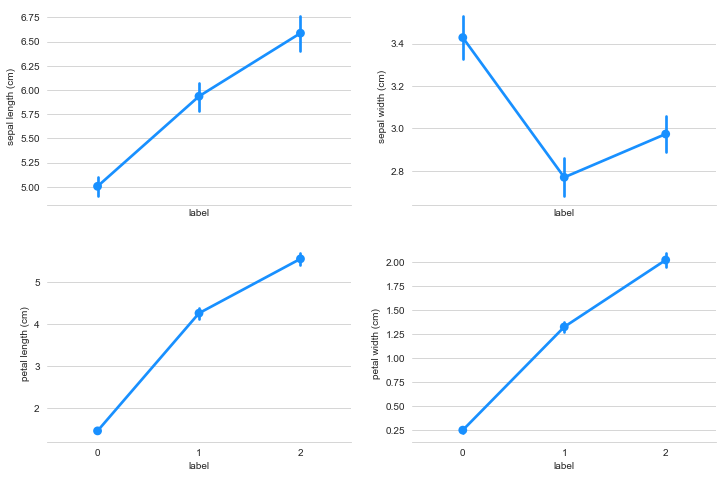

In [23]:
# 绘制  pointplot
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
sns.despine(left=True)

sns.pointplot(x='label', y='sepal length (cm)', data=iris_df,  color=antV[0], ax=axes[0, 0])
sns.pointplot(x='label', y='sepal width (cm)', data=iris_df, color=antV[0], ax=axes[0, 1])
sns.pointplot(x='label', y='petal length (cm)', data=iris_df, color=antV[0], ax=axes[1, 0])
sns.pointplot(x='label', y='petal width (cm)', data=iris_df, color=antV[0], ax=axes[1, 1])
plt.savefig("pointplot.png")
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14']

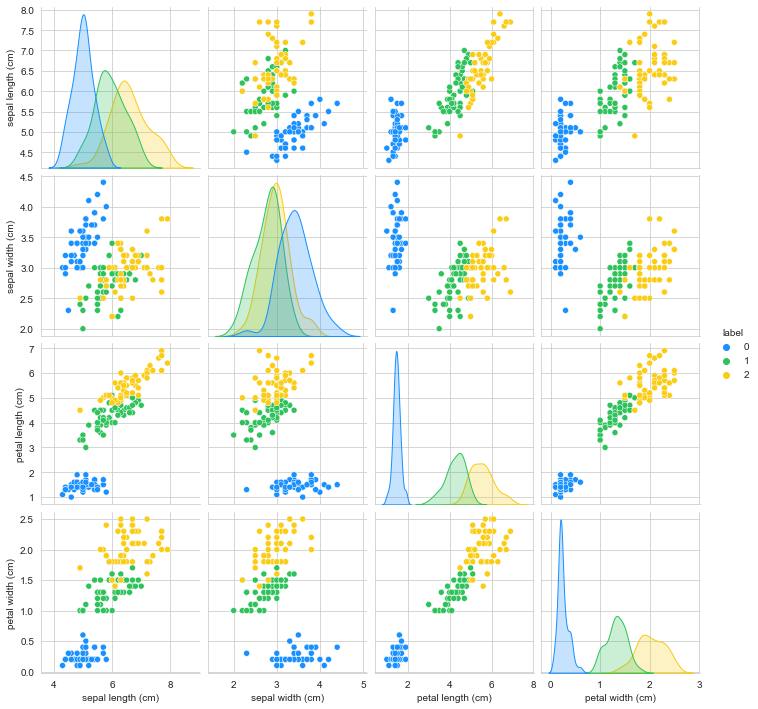

In [19]:
#  生成各特征之间关系的矩阵图
g = sns.pairplot(data=iris_df, palette=antV, hue='label')
plt.savefig("features_mat.png")
plt.show()

D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\pandas\plotting\_matplotlib\misc.py:241: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(-np.pi, np.pi))


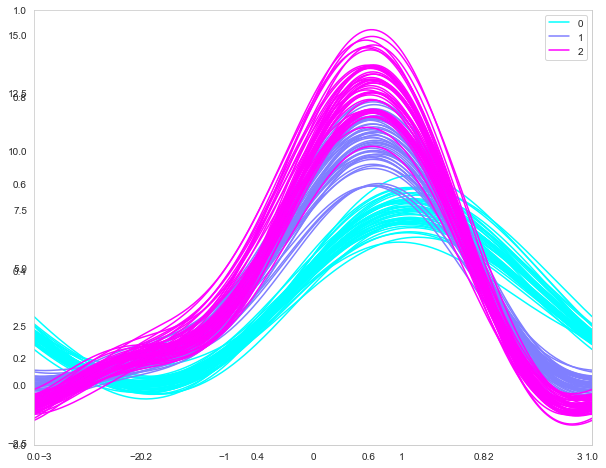

In [24]:
from pandas import plotting
plt.subplots(figsize = (10,8))
plotting.andrews_curves(iris_df, 'label', colormap='cool')
plt.show()

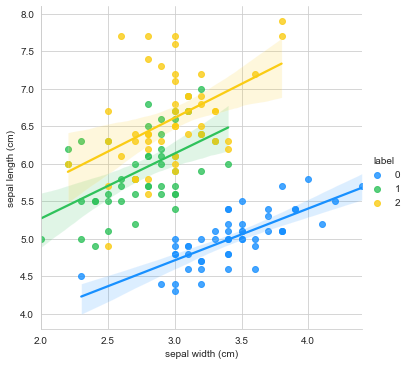

In [26]:
g = sns.lmplot(data=iris_df, x='sepal width (cm)', y='sepal length (cm)', palette=antV, hue='label')
plt.savefig("lm_sepal.png")
plt.show()

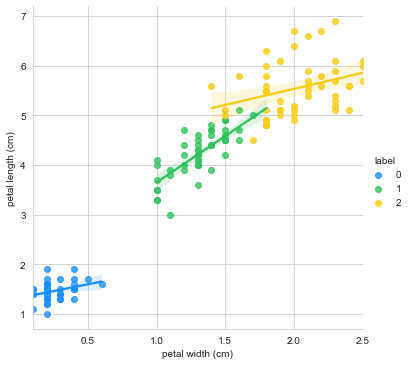

In [28]:
g = sns.lmplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', palette=antV, hue='label')
plt.savefig("lm_petal.png")
plt.show()

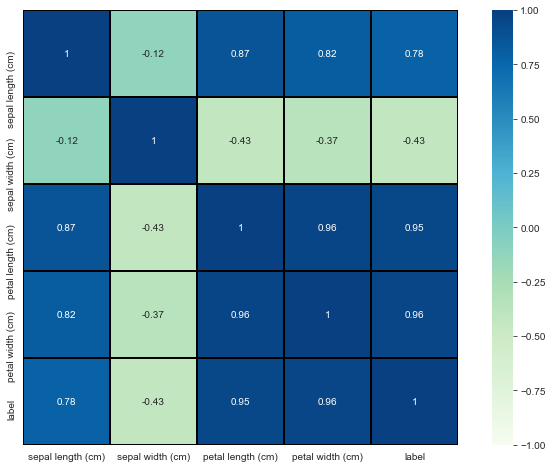

In [33]:
fig=plt.gcf()
fig.set_size_inches(12, 8)
fig=sns.heatmap(iris_df.corr(), annot=True, cmap='GnBu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)
plt.savefig("freatures_hm.png")
plt.show()

### 3.2 各维度可视化

#### 3.2.1 绘制各维度直方图

#### 3.2.2 绘制各维度散点图矩阵

#### 3.2.3 其它数据可视化

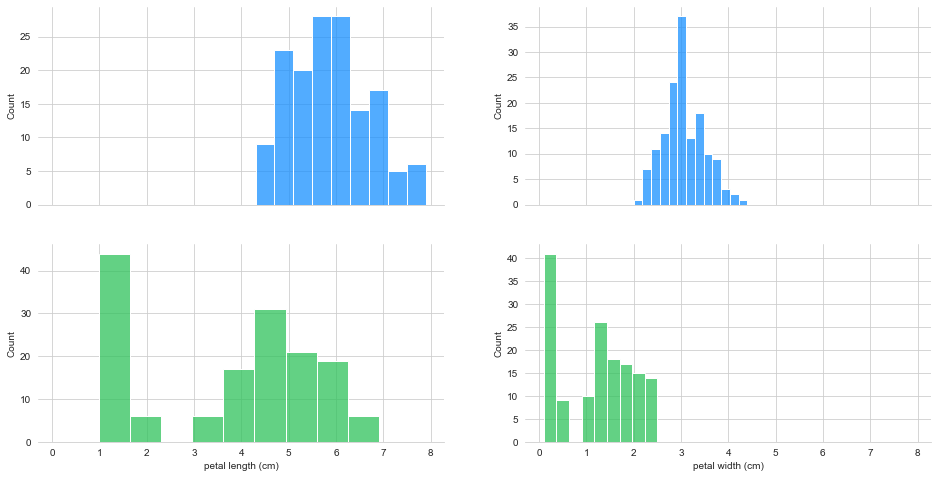

In [16]:
f, axes = plt.subplots(2,2, figsize=(16, 8), sharex=True)
sns.despine(left=True)
# sns.histplot(x=iris_df['label'],  color=antV[2], ax=axes[2, 0])
sns.histplot(x=iris_df['sepal length (cm)'], color=antV[0], ax=axes[0, 0])
sns.histplot(x=iris_df['sepal width (cm)'],  color=antV[0], ax=axes[0, 1])
sns.histplot(x=iris_df['petal length (cm)'],  color=antV[1], ax=axes[1, 0])
sns.histplot(x=iris_df['petal width (cm)'],  color=antV[1], ax=axes[1, 1])
plt.savefig("features_hist.png")
plt.show()

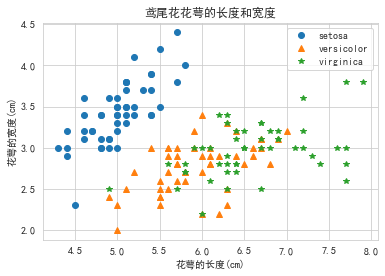

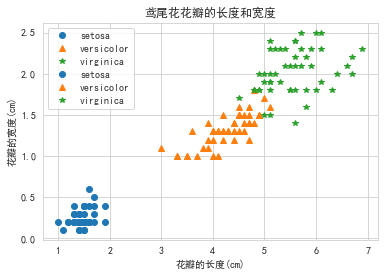

In [38]:
from collections import Counter, defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
 
style_list = ['o', '^', '*']       # 设置点的不同形状，不同形状默认颜色不同，也可自定义
data = iris_dataset.data
labels = iris_dataset.target_names
cc = defaultdict(list)
 
for i, d in enumerate(data):
    cc[labels[int(i/50)]].append(d) 
p_list = []
c_list = []
 
for each in [0, 2]:
    for i, (c, ds) in enumerate(cc.items()):
        draw_data = np.array(ds)
        p = plt.plot(draw_data[:, each], draw_data[:, each+1], style_list[i])
        p_list.append(p)
        c_list.append(c)
 
    plt.legend(map(lambda x: x[0], p_list), c_list)
    plt.title('鸢尾花花瓣的长度和宽度') if each else plt.title('鸢尾花花萼的长度和宽度')
    plt.xlabel('花瓣的长度(cm)') if each else plt.xlabel('花萼的长度(cm)')
    plt.ylabel('花瓣的宽度(cm)') if each else plt.ylabel('花萼的宽度(cm)')
    plt.show()


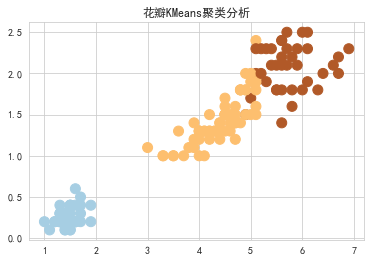

In [40]:
from sklearn.cluster import KMeans
import pandas as pd
kms = KMeans(n_clusters=3)
kms.fit(iris_dataset.data,iris_dataset.target)
predicted = kms.predict(iris_dataset.data)

names = ['花萼-length', '花萼-width', '花瓣-length', '花瓣-width'] 
df = pd.DataFrame(iris_dataset.data,columns=names)    
L1 = df['花瓣-length'].values   
L2 = df['花瓣-width'].values    
 
plt.scatter(L1, L2, c=predicted, marker='o',s=100,cmap=plt.cm.Paired)    
plt.title("花瓣KMeans聚类分析")    
plt.show() 

D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\myDevs\Anaconda\envs\pytorch_

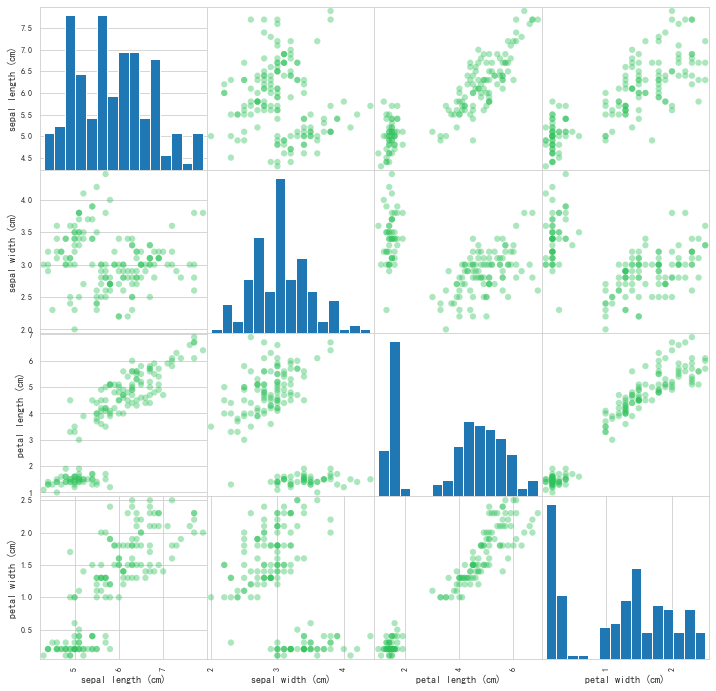

In [41]:
from matplotlib import cm
from pandas.plotting import scatter_matrix as sm
import matplotlib.pyplot as plt
import pandas as pd
cmap = cm.get_cmap('gnuplot')
s = sm(iris_df[iris_dataset.feature_names], c=antV[1],marker="o", s=40,hist_kwds={ 'bins': 15}, figsize=(12, 12), cmap=cmap, alpha=0.4)
plt.savefig("feartures_scatter_mat.png")
plt.show()
# scatter = sm(iris_df[iris_dataset.feature_names], columns=[iris_dataset.feature_names], marker="o", s=40, hist_kwds={ 'bins': 15}, figsize=(12, 12), cmap=cmap)

In [112]:
iris_dataset.feature_names[:]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 3.3 决策树

此部分包含下列步骤：

划分数据集为训练集和测试集，训练决策树模型，模型可视化，模型调参调优效果对比。

#### 3.3.1 划分数据集

划分数据集为75%训练集25%测试集


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_df[iris_dataset.feature_names[:]], iris_df['label'], random_state=0)

#### 3.3.2 训练决策树模型

从sklearn库里导入决策树分类器，设置一些参数将模型实例化，然后用训练集进行决策树模型训练。

In [6]:
dt_clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [7]:
# 预测
pred = dt_clf.predict(X_test)
print('决策树的 accuracy 为 {0}'.format(metrics.accuracy_score(pred,Y_test)))

决策树的 accuracy 为 0.9736842105263158


#### 3.3.3 可视化决策树模型



In [8]:
tree.plot_tree(dt_clf);

In [9]:
import matplotlib.pyplot as plt
fn=iris_dataset.feature_names  # fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'
cn=iris_dataset.target_names  # cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (6,6), dpi=300)
tree.plot_tree(dt_clf,
               feature_names=fn, 
               class_names=cn,
               filled = True);
fig.savefig('vis_dt.png')

In [10]:
# 使用graphviz可视化决策树
tree.export_graphviz(dt_clf,
                     out_file="dt.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [11]:
! dot -Tpng -Gdpi=300 dt.dot -o dt_graphviz.png

In [199]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


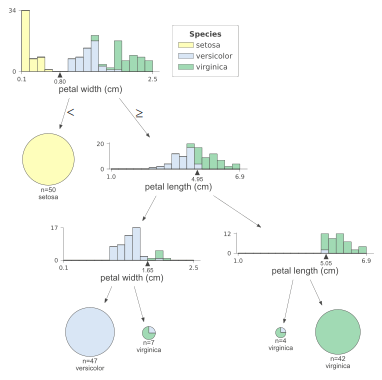

In [12]:

from dtreeviz.trees import dtreeviz
viz = dtreeviz(dt_clf,
               iris_dataset.data,
               iris_dataset.target,
               target_name='Species',
               feature_names=iris_dataset.feature_names,
               class_names={0:'setosa',1:'versicolor',2:'virginica'})
viz.save("dtreeviz.svg")         
viz

#### 3.3.4 决策树调参

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_df[iris_dataset.feature_names[:1]], iris_df['label'], random_state=0)

In [150]:
dt_clf = DecisionTreeClassifier(max_depth = 10, 
                             random_state = 0)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [151]:
pred = dt_clf.predict(X_test)
print('The accuracy of the Decision Tree is: {0}'.format(metrics.accuracy_score(pred,Y_test)))

The accuracy of the Decision Tree is: 0.5526315789473685


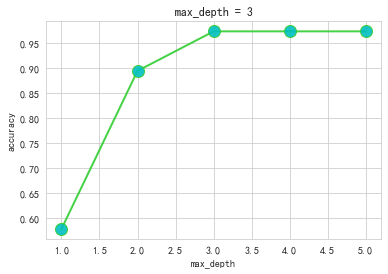

In [63]:
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

import matplotlib.pyplot as plt
y1=accuracy
x1=range(1,6)
plt.plot(x1,y1,label='',linewidth=2,color='limegreen',marker='o',markerfacecolor='c',markersize=12,alpha=0.9)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('max_depth = 3')
plt.savefig("best_max_depth.png")
plt.show()

In [35]:
iris_dataset.feature_names[:]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

[0.5526315789473685, 0.5789473684210527, 0.8947368421052632, 0.9736842105263158]


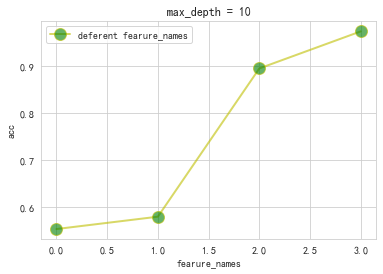

In [177]:
acc = []
for i in range(4):
    X_train, X_test, Y_train, Y_test = train_test_split(iris_df[iris_dataset.feature_names[i:i+1]], iris_df['label'], random_state=0)
    dt_clf = DecisionTreeClassifier(max_depth = 10, random_state = 0)
    dt_clf.fit(X_train, Y_train)
    pred = dt_clf.predict(X_test)
    res = metrics.accuracy_score(pred,Y_test)
    acc.append(res)
    
print(acc)

import matplotlib.pyplot as plt
y1=acc
x1=range(4)
plt.plot(x1,y1,label='deferent fearure_names',linewidth=2,color='y',
         marker='o',markerfacecolor='green',markersize=12,alpha=0.6)
plt.xlabel('fearure_names')
plt.ylabel('acc')
plt.title('max_depth = 10')
plt.legend()
plt.show()


In [41]:
def acc_test(fn):
    acc_list=[]
    X_train, X_test, Y_train, Y_test = train_test_split(iris_df[[fn]], iris_df['label'], random_state=0)
    for i in range(1,6):
        dt_clf = DecisionTreeClassifier(max_depth = i, random_state = 0)
        dt_clf.fit(X_train, Y_train)
        pred = dt_clf.predict(X_test)
        res = metrics.accuracy_score(pred,Y_test)
        acc_list.append(res)
    return acc_list
        
acc_pl = acc_test('petal length (cm)')
acc_pw = acc_test('petal width (cm)')
acc_sl = acc_test('sepal length (cm)')
acc_sw = acc_test('sepal width (cm)')

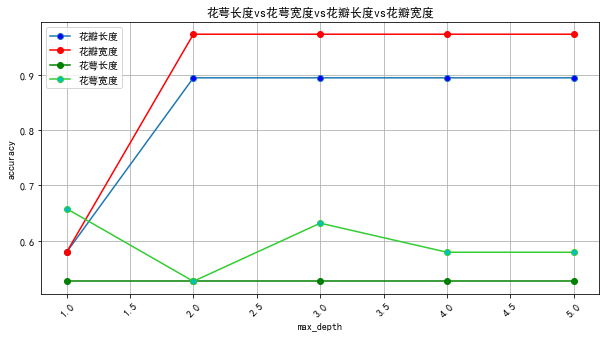

In [53]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

x=range(1,6)
plt.figure(figsize=(10,5))
plt.title("花萼长度vs花萼宽度vs花瓣长度vs花瓣宽度")
plt.xlabel("max_depth")
plt.xticks(rotation=45)
plt.ylabel("accuracy")
plt.plot(x,acc_pl,'-',marker='o',markerfacecolor='b',markersize=6,label="花瓣长度")
plt.plot(x,acc_pw,'-',color='r',marker='o',markerfacecolor='r',markersize=6,label="花瓣宽度")
plt.plot(x,acc_sl,'-',color='g',marker='o',markerfacecolor='green',markersize=6,label="花萼长度")
plt.plot(x,acc_sw,'-',color='limegreen',marker='o',markerfacecolor='c',markersize=6,label="花萼宽度")
plt.legend()
plt.grid()
plt.savefig("pl_pw_sl_sw.png")
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_df[iris_dataset.feature_names[2:4]], iris_df['label'], random_state=0)
max_depth_range = list(range(1, 6))
acc = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    acc.append(score)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

x=range(1,6)
plt.figure(figsize=(10,5))
plt.title("花萼长度vs花萼宽度vs花瓣长度vs花瓣宽度")
plt.xlabel("max_depth")
plt.xticks(rotation=45)
plt.ylabel("accuracy")
plt.plot(x,acc,'-',color='g',label="花萼长度")

plt.legend()
plt.grid()
plt.savefig("pl_pw_sl_sw.png")
plt.show()

[0.5789473684210527, 0.8947368421052632, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]


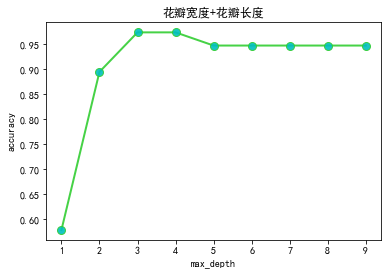

In [58]:
acc = []
X_train, X_test, Y_train, Y_test = train_test_split(iris_df[['petal length (cm)','petal width (cm)']], iris_df['label'], random_state=0)
for i in range(1,10):
    dt_clf = DecisionTreeClassifier(max_depth = i, random_state = 0)
    dt_clf.fit(X_train, Y_train)
    pred = dt_clf.predict(X_test)
    res = metrics.accuracy_score(pred,Y_test)
    acc.append(res)
    
print(acc)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
y1=acc
x1=range(1,10)
plt.plot(x1,y1,label='',linewidth=2,color='limegreen',marker='o',markerfacecolor='c',markersize=8,alpha=0.9)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('花瓣宽度+花瓣长度')
plt.savefig("petal_width_lenth.png")
plt.show()

## 四、扩展实验

### 随机森林模型训练及可视化

随机森林是由很多决策树构成的，不同决策树之间没有关联。

当我们进行分类任务时，新的输入样本进入，就让森林中的每一棵决策树分别进行判断和分类，每个决策树会得到一个自己的分类结果，决策树的分类结果中哪一个分类最多，那么随机森林就会把这个结果当做最终的结果。

In [59]:
from sklearn.ensemble import RandomForestClassifier

df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df['target'] = iris_dataset.target
# 将数据转换为特征矩阵和目标向量
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values
# 将数据集分割为训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
# scikit-learn里的随机森林模型 (N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [60]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

In [62]:
fn=iris_dataset.feature_names
cn=iris_dataset.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [63]:
# This may not the best way to view each estimator as it is small
fn=iris_dataset.feature_names
cn=iris_dataset.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=800)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

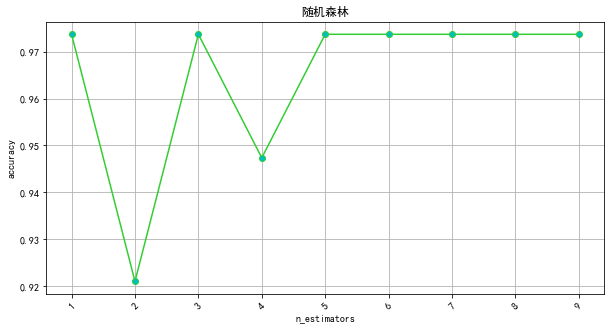

In [75]:
acc_rf = []
for i in range(1,10):
    rf = RandomForestClassifier(n_estimators=i,
                                random_state=0)
    rf.fit(X_train, Y_train)
    pred = rf.predict(X_test)
    acc_rf.append(metrics.accuracy_score(pred,Y_test))

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

x=range(1,10)
plt.figure(figsize=(10,5))
plt.title("随机森林")
plt.xlabel("n_estimators")
plt.xticks(rotation=45)
plt.ylabel("accuracy")
plt.plot(x,acc_rf,'-',color='limegreen',marker='o',markerfacecolor='c',markersize=6)
plt.grid()
plt.savefig("rf_acc_curve.png")
plt.show()

In [76]:

pred = rf.predict(X_test)
print(metrics.accuracy_score(pred,Y_test))

0.9736842105263158


In [16]:
from sklearn.preprocessing import MinMaxScaler
# 区间缩放法,将原始数据中特征的取值区间转换到[0 1]范围

scaler = MinMaxScaler(feature_range=(0,1))
iris_X = scaler.fit_transform(iris_X)
# print(iris_X)

In [ ]:
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
StandardScaler().fit_transform(iris.data)

In [ ]:
from sklearn.preprocessing import Normalizer
#归一化，返回值为归一化后的数据
Normalizer().fit_transform(iris.data)

In [ ]:
from sklearn.preprocessing import Binarizer
#二值化，阈值设置为3，返回值为二值化后的数据
Binarizer(threshold=3).fit_transform(iris.data)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#对IRIS数据集的目标值进行one-hot编码
OneHotEncoder().fit_transform(iris.target.reshape((-1,1)))

In [24]:
import sklearn.model_selection as sk_model_selection
X_train,X_test,y_train,y_test = sk_model_selection.train_test_split(iris_X,iris_y,train_size=1/2,random_state=0)

In [25]:
#导入模型
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#fit（）训练
lr = LogisticRegression()
lr.fit(X_train,y_train)
#predict
result = lr.predict(X_test)
print('预测的结果',result)
print('实际的结果',y_test)

预测的结果 [2 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 0 2 1 1 1 1 2 0 0 2 1 0 0
 2]
实际的结果 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


In [19]:
#默认参数
params=lr.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [26]:
#模型评分 准确率
s1 = lr.score(X_train,y_train)
s2 = lr.score(X_test,y_test)
print('在训练集上的准确度评分',s1)
print('在测试集上的准确度评分',s2)

在训练集上的准确度评分 0.9466666666666667
在测试集上的准确度评分 0.8533333333333334


In [33]:
X=iris_X
y=iris_y
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv_split = ShuffleSplit(n_splits=5, train_size=0.7, test_size=0.2)
score_ndarray = cross_val_score(lr, X, y, cv=cv_split)
print(score_ndarray)
score_ndarray.mean()

[0.93333333 0.8        0.93333333 0.93333333 0.93333333]


0.9066666666666668

In [36]:
#模型目标的参数
from sklearn.model_selection import GridSearchCV
penaltys=['l1','l2']#l1 或l2正则化
cs = [1.0,1.1,1.2,1.3,1.4,1.5]
param_grid = {'penalty':penaltys,'C':cs}
#print(param_grid)
gsc = GridSearchCV(LogisticRegression(),param_grid)
#print(x_train)
gsc.fit(X_train,y_train)

print('最佳模型参数的评分:',gsc.best_score_)
print('最优参数')
best_params = gsc.best_estimator_.get_params()
print(best_params)
for param_name in sorted(param_grid.keys()):
    print(param_name,':',best_params[param_name])

D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFail

最佳模型参数的评分: 0.9333333333333333
最优参数
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
C : 1.0
penalty : l2


D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\myDevs\Anaconda\envs\pytorch_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


In [39]:
#预测为某个类型的概率
result = lr.predict_proba(X_test)
print(result)

[[0.0327273  0.29983706 0.66743565]
 [0.17125317 0.64435719 0.18438965]
 [0.91338451 0.0653857  0.02122979]
 [0.01921636 0.2623766  0.71840704]
 [0.8564132  0.1250236  0.0185632 ]
 [0.01561192 0.15758513 0.82680295]
 [0.8670275  0.11364826 0.01932424]
 [0.1011446  0.37338265 0.52547275]
 [0.08868093 0.44434578 0.4669733 ]
 [0.18656509 0.49383309 0.31960182]
 [0.0721885  0.49736862 0.43044289]
 [0.13340561 0.37095039 0.49564399]
 [0.15334493 0.50226225 0.34439282]
 [0.09868596 0.44751716 0.45379688]
 [0.13158939 0.45569555 0.41271506]
 [0.89522276 0.09106837 0.01370887]
 [0.13440996 0.44907084 0.4165192 ]
 [0.18969018 0.55679607 0.25351375]
 [0.80717001 0.17392009 0.01890991]
 [0.87894141 0.09360498 0.02745361]
 [0.06883322 0.39546656 0.53570022]
 [0.16615473 0.44032458 0.39352068]
 [0.84271554 0.13642146 0.020863  ]
 [0.82652838 0.16053131 0.01294031]
 [0.07093406 0.40365994 0.525406  ]
 [0.91204138 0.07722982 0.01072881]
 [0.84966521 0.11722431 0.03311049]
 [0.16796535 0.46908932 0.36